In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from datetime import datetime

In [2]:
df = pd.read_csv("pjm_hourly_est.csv")

df

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN


In [3]:
df = pd.read_csv("pjm_hourly_est.csv")

df["Datetime"] = pd.to_datetime(df["Datetime"], format = "%Y-%m-%d %H:%M:%S")


# df2 is for the first cluster 
df2 = df[["Datetime","DEOK","DOM","DUQ"]][(df["DEOK"].isnull() == False) &  (df["DOM"].isnull() == False) & (df["DUQ"].isnull() == False)]
df2 = df2.reset_index(drop = True)

df2

,Datetime,DEOK,DOM,DUQ
0,2012-12-31 01:00:00,2945.0,11570.0,1556.0
1,2012-12-31 02:00:00,2868.0,11462.0,1509.0
2,2012-12-31 03:00:00,2812.0,11548.0,1479.0
3,2012-12-31 04:00:00,2812.0,11811.0,1468.0
4,2012-12-31 05:00:00,2860.0,12232.0,1488.0
...,...,...,...,...
57734,2018-01-01 20:00:00,4426.0,18418.0,1962.0
57735,2018-01-01 21:00:00,4419.0,18567.0,1940.0
57736,2018-01-01 22:00:00,4355.0,18307.0,1891.0
57737,2018-01-01 23:00:00,4224.0,17814.0,1820.0


In [55]:
df2["Season"] = 0

for i in range(0,len(df2)):
    if df2["Datetime"][i].month == 12 or df2["Datetime"][i].month == 1 or df2["Datetime"][i].month == 2:
        df2["Season"][i] = "Winter"
    elif df2["Datetime"][i].month == 3 or df2["Datetime"][i].month == 4 or df2["Datetime"][i].month == 5:
        df2["Season"][i] = "Spring"
    elif df2["Datetime"][i].month == 6 or df2["Datetime"][i].month == 7 or df2["Datetime"][i].month == 8:
        df2["Season"][i] = "Summer"
    else:
        df2["Season"][i] = "Fall"

df2

C:\Users\dcwyn\AppData\Local\Temp\ipykernel_19396\1905111283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Season"][i] = "Winter"


,Datetime,DEOK,DOM,DUQ,Season
0,2012-12-31 01:00:00,2945.0,11570.0,1556.0,Winter
1,2012-12-31 02:00:00,2868.0,11462.0,1509.0,Winter
2,2012-12-31 03:00:00,2812.0,11548.0,1479.0,Winter
3,2012-12-31 04:00:00,2812.0,11811.0,1468.0,Winter
4,2012-12-31 05:00:00,2860.0,12232.0,1488.0,Winter
...,...,...,...,...,...
57734,2018-01-01 20:00:00,4426.0,18418.0,1962.0,Winter
57735,2018-01-01 21:00:00,4419.0,18567.0,1940.0,Winter
57736,2018-01-01 22:00:00,4355.0,18307.0,1891.0,Winter
57737,2018-01-01 23:00:00,4224.0,17814.0,1820.0,Winter


Text(0.5, 1.0, 'Count of Seasons')

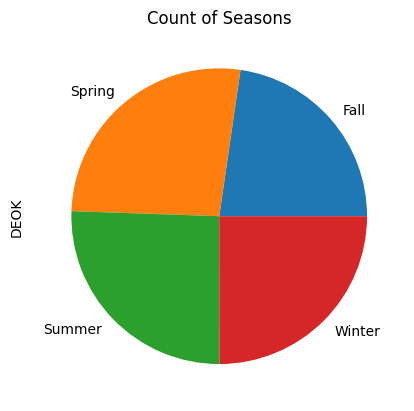

In [56]:
df2["Datetime"][0].month == 12
#5135


#df2.groupby("Season")["PJM_Load"].count().plot(kind = "bar")

df2.groupby("Season")["DEOK"].count().plot(kind = "pie")
plt.title("Count of Seasons")

In [57]:
df2 = pd.get_dummies(df2, columns = ["Season"], prefix = "", prefix_sep= "")

df2

,Datetime,DEOK,DOM,DUQ,Fall,Spring,Summer,Winter
0,2012-12-31 01:00:00,2945.0,11570.0,1556.0,0,0,0,1
1,2012-12-31 02:00:00,2868.0,11462.0,1509.0,0,0,0,1
2,2012-12-31 03:00:00,2812.0,11548.0,1479.0,0,0,0,1
3,2012-12-31 04:00:00,2812.0,11811.0,1468.0,0,0,0,1
4,2012-12-31 05:00:00,2860.0,12232.0,1488.0,0,0,0,1
...,...,...,...,...,...,...,...,...
57734,2018-01-01 20:00:00,4426.0,18418.0,1962.0,0,0,0,1
57735,2018-01-01 21:00:00,4419.0,18567.0,1940.0,0,0,0,1
57736,2018-01-01 22:00:00,4355.0,18307.0,1891.0,0,0,0,1
57737,2018-01-01 23:00:00,4224.0,17814.0,1820.0,0,0,0,1


In [58]:
x = df2[df2.columns[[1,2,3]]].values

#x = df2[df2.columns[1:]].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)


x

array([[0.44909652, 0.34385577, 0.26568627],
       [0.43212869, 0.33682635, 0.24264706],
       [0.41978845, 0.34242385, 0.22794118],
       ...,
       [0.75980608, 0.78234835, 0.42990196],
       [0.73093874, 0.75026035, 0.39509804],
       [0.70361393, 0.72513668, 0.34656863]])

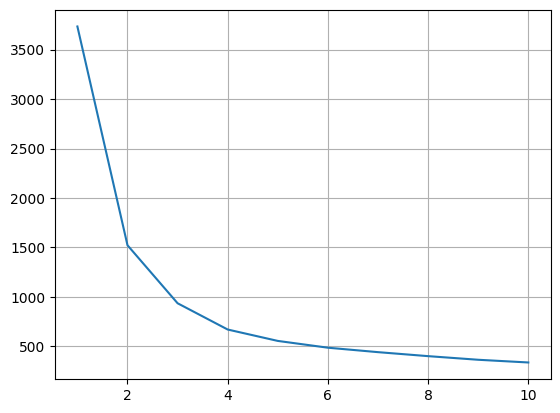

In [59]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 50, random_state =100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.grid()

In [60]:
#kmeans = KMeans(n_clusters = 4, init = "k-means++", max_iter = 200, n_init = 10, random_state = 0)
kmeans = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 50, random_state =100)
# n_init is number of times the algorithim will run with centroid different seeds
# random state is random number for making centroid

y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([3, 3, 3, ..., 2, 2, 2])

In [61]:
df2["cluster"] = y_kmeans

df2

,Datetime,DEOK,DOM,DUQ,Fall,Spring,Summer,Winter,cluster
0,2012-12-31 01:00:00,2945.0,11570.0,1556.0,0,0,0,1,3
1,2012-12-31 02:00:00,2868.0,11462.0,1509.0,0,0,0,1,3
2,2012-12-31 03:00:00,2812.0,11548.0,1479.0,0,0,0,1,3
3,2012-12-31 04:00:00,2812.0,11811.0,1468.0,0,0,0,1,3
4,2012-12-31 05:00:00,2860.0,12232.0,1488.0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...
57734,2018-01-01 20:00:00,4426.0,18418.0,1962.0,0,0,0,1,2
57735,2018-01-01 21:00:00,4419.0,18567.0,1940.0,0,0,0,1,2
57736,2018-01-01 22:00:00,4355.0,18307.0,1891.0,0,0,0,1,2
57737,2018-01-01 23:00:00,4224.0,17814.0,1820.0,0,0,0,1,2


centers = kmeans.cluster_centers_

centers[:,1]

closest= pairwise_distances_argmin_min(centers, x)

closest #indexes of the points closest
df2.iloc[45249] #Winter 0
#df2.iloc[54600] #Spring 1
#df2.iloc[48542] #Summer 2
#df2.iloc[14884] #Spring 3

#df2[df2["Fall"] == 1]

#df2.groupby("Summer").count()

In [62]:
df2.pivot_table((["Fall", "Spring", "Summer", "Winter"]),index = ["cluster"])

,Fall,Spring,Summer,Winter
cluster,,,,
0,0.326964,0.396249,0.159165,0.117622
1,0.120504,0.155909,0.317660,0.405927
2,0.081975,0.058093,0.671131,0.188801
3,0.270028,0.313510,0.165482,0.250980


<AxesSubplot: xlabel='cluster'>

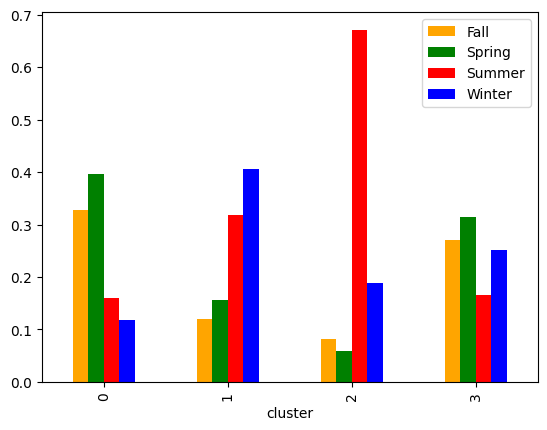

In [63]:
df2.pivot_table((["Fall", "Spring", "Summer", "Winter"]),index = ["cluster"]).plot(kind = "bar", 
                                                                                   color = ["orange", "green","red", "blue"])

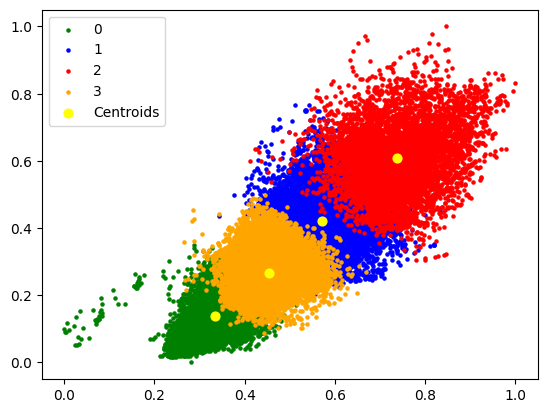

In [64]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 5, c = "green", label = 0) #cluster 0
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 5, c = "blue", label = 1) #cluster 1
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 5, c = "red", label = 2) #cluster 2
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 5, c = "orange", label = 3) #cluster 3

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'yellow', label = 'Centroids')
plt.legend()

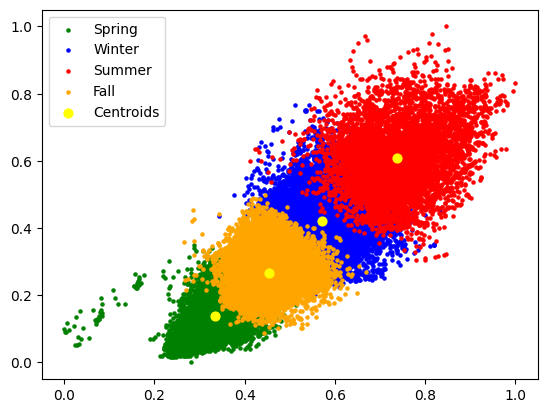

In [65]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 5, c = "green", label = "Spring") #cluster 0
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 5, c = "blue", label = "Winter") #cluster 1
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 5, c = "red", label = "Summer") #cluster 2
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 5, c = "orange", label = "Fall") #cluster 3


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'yellow', label = 'Centroids')
plt.legend()

In [66]:
df

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN


In [67]:
# df3 is for the second cluster
# includes companies aep dayton pjmw duq ekpc
df3 = df.copy()
df3 = df3[["Datetime","AEP","DAYTON","PJMW", "DUQ", "EKPC"]][(df3["AEP"].isnull() == False) &  (df["DAYTON"].isnull() == False) & (df["PJMW"].isnull() == False)
& (df["DUQ"].isnull() == False) & (df["EKPC"].isnull() == False)]
df3 = df3.reset_index(drop = True)

df3

,Datetime,AEP,DAYTON,PJMW,DUQ,EKPC
0,2013-12-31 01:00:00,15128.0,1930.0,5840.0,1563.0,1861.0
1,2013-12-31 02:00:00,14886.0,1884.0,5710.0,1498.0,1835.0
2,2013-12-31 03:00:00,14831.0,1845.0,5617.0,1469.0,1841.0
3,2013-12-31 04:00:00,14873.0,1843.0,5661.0,1461.0,1872.0
4,2013-12-31 05:00:00,15001.0,1875.0,5732.0,1481.0,1934.0
...,...,...,...,...,...,...
45328,2018-01-01 20:00:00,21089.0,2732.0,8401.0,1962.0,2866.0
45329,2018-01-01 21:00:00,20999.0,2724.0,8373.0,1940.0,2846.0
45330,2018-01-01 22:00:00,20820.0,2664.0,8238.0,1891.0,2883.0
45331,2018-01-01 23:00:00,20415.0,2614.0,7958.0,1820.0,2880.0


In [68]:
df3["Time_day"] = 0

day = range(7,19) #from 7am to 6pm

for i in range(0,len(df3)):
    if df3["Datetime"][i].hour in day:
        df3["Time_day"][i] = "Day" # day time
    else:
        df3["Time_day"][i] = "Night" # night time

df3

C:\Users\dcwyn\AppData\Local\Temp\ipykernel_19396\4291826186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Time_day"][i] = "Night" # night time


,Datetime,AEP,DAYTON,PJMW,DUQ,EKPC,Time_day
0,2013-12-31 01:00:00,15128.0,1930.0,5840.0,1563.0,1861.0,Night
1,2013-12-31 02:00:00,14886.0,1884.0,5710.0,1498.0,1835.0,Night
2,2013-12-31 03:00:00,14831.0,1845.0,5617.0,1469.0,1841.0,Night
3,2013-12-31 04:00:00,14873.0,1843.0,5661.0,1461.0,1872.0,Night
4,2013-12-31 05:00:00,15001.0,1875.0,5732.0,1481.0,1934.0,Night
...,...,...,...,...,...,...,...
45328,2018-01-01 20:00:00,21089.0,2732.0,8401.0,1962.0,2866.0,Night
45329,2018-01-01 21:00:00,20999.0,2724.0,8373.0,1940.0,2846.0,Night
45330,2018-01-01 22:00:00,20820.0,2664.0,8238.0,1891.0,2883.0,Night
45331,2018-01-01 23:00:00,20415.0,2614.0,7958.0,1820.0,2880.0,Night


Text(0.5, 1.0, 'Count of Hours')

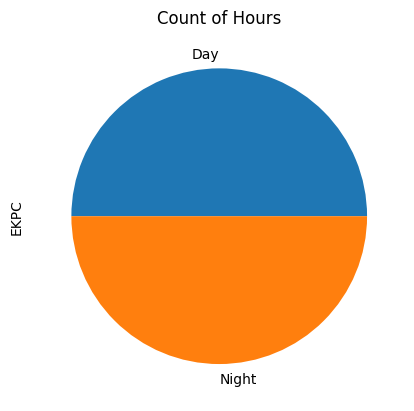

In [69]:
df3.groupby("Time_day")["EKPC"].count().plot(kind = "pie")
plt.title("Count of Hours")

In [70]:
df3 = pd.get_dummies(df3, columns = ["Time_day"], prefix = "", prefix_sep= "")

df3

,Datetime,AEP,DAYTON,PJMW,DUQ,EKPC,Day,Night
0,2013-12-31 01:00:00,15128.0,1930.0,5840.0,1563.0,1861.0,0,1
1,2013-12-31 02:00:00,14886.0,1884.0,5710.0,1498.0,1835.0,0,1
2,2013-12-31 03:00:00,14831.0,1845.0,5617.0,1469.0,1841.0,0,1
3,2013-12-31 04:00:00,14873.0,1843.0,5661.0,1461.0,1872.0,0,1
4,2013-12-31 05:00:00,15001.0,1875.0,5732.0,1481.0,1934.0,0,1
...,...,...,...,...,...,...,...,...
45328,2018-01-01 20:00:00,21089.0,2732.0,8401.0,1962.0,2866.0,0,1
45329,2018-01-01 21:00:00,20999.0,2724.0,8373.0,1940.0,2846.0,0,1
45330,2018-01-01 22:00:00,20820.0,2664.0,8238.0,1891.0,2883.0,0,1
45331,2018-01-01 23:00:00,20415.0,2614.0,7958.0,1820.0,2880.0,0,1


In [71]:
x = df3[df3.columns[1:6]].values
# does not include the times only company energy production

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x

array([[0.36594538, 0.34668447, 0.41316242, 0.28342798, 0.45262097],
       [0.34998021, 0.32621273, 0.39284039, 0.24987093, 0.44388441],
       [0.34635176, 0.30885625, 0.37830233, 0.23489933, 0.44590054],
       ...,
       [0.74145666, 0.67334223, 0.78802564, 0.452762  , 0.79603495],
       [0.71473809, 0.65109034, 0.74425512, 0.41610738, 0.79502688],
       [0.68689801, 0.623498  , 0.7025168 , 0.36499742, 0.78360215]])

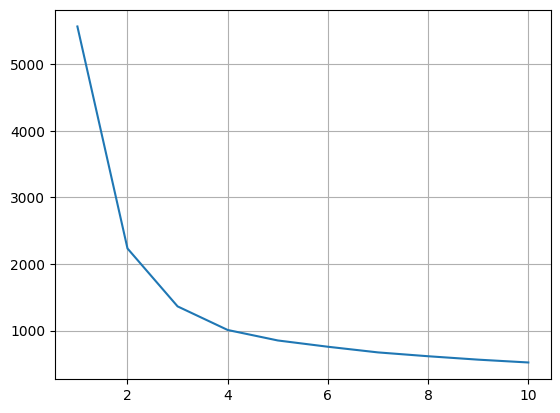

In [72]:
wcss = []

for i in range(1,11):
    #kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 200, n_init = 10, random_state = 0)
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 50, random_state = 100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.grid()

In [73]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 50, random_state =100)

y_kmeans = kmeans.fit_predict(x)

df3["cluster"] = y_kmeans

df3

,Datetime,AEP,DAYTON,PJMW,DUQ,EKPC,Day,Night,cluster
0,2013-12-31 01:00:00,15128.0,1930.0,5840.0,1563.0,1861.0,0,1,0
1,2013-12-31 02:00:00,14886.0,1884.0,5710.0,1498.0,1835.0,0,1,0
2,2013-12-31 03:00:00,14831.0,1845.0,5617.0,1469.0,1841.0,0,1,0
3,2013-12-31 04:00:00,14873.0,1843.0,5661.0,1461.0,1872.0,0,1,0
4,2013-12-31 05:00:00,15001.0,1875.0,5732.0,1481.0,1934.0,0,1,0
...,...,...,...,...,...,...,...,...,...
45328,2018-01-01 20:00:00,21089.0,2732.0,8401.0,1962.0,2866.0,0,1,1
45329,2018-01-01 21:00:00,20999.0,2724.0,8373.0,1940.0,2846.0,0,1,1
45330,2018-01-01 22:00:00,20820.0,2664.0,8238.0,1891.0,2883.0,0,1,1
45331,2018-01-01 23:00:00,20415.0,2614.0,7958.0,1820.0,2880.0,0,1,1


In [74]:
df3.pivot_table((["Day", "Night"]),index = ["cluster"])

,Day,Night
cluster,,
0,0.433263,0.566737
1,0.613022,0.386978


<AxesSubplot: xlabel='cluster'>

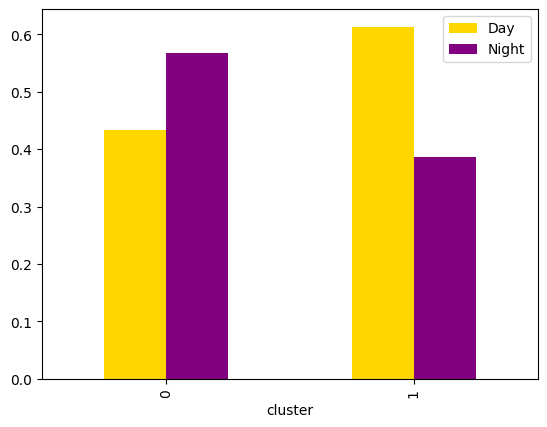

In [75]:
df3.pivot_table((["Day","Night"]),index = ["cluster"]).plot(kind = "bar", color = ["gold","purple"])

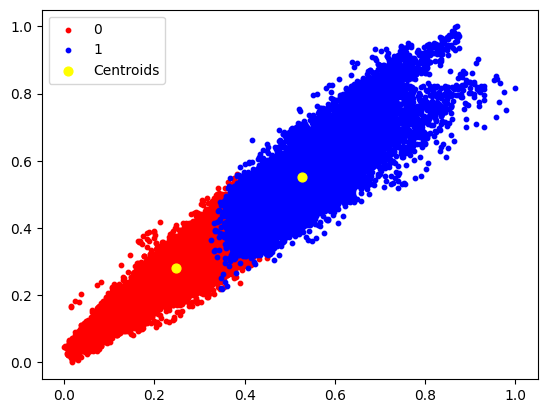

In [76]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = "red", label = 0)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = "blue", label = 1)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'yellow', label = 'Centroids')
plt.legend()

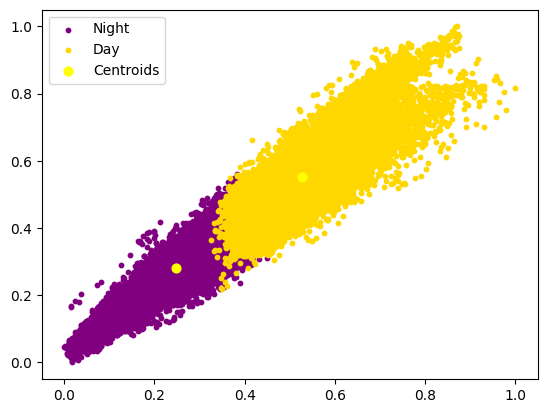

In [77]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = "purple", label = "Night")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = "gold", label = "Day")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'yellow', label = 'Centroids')
plt.legend()

In [4]:
df4 = df.copy()

df4 = df4[["Datetime","FE","COMED","DOM"]][(df4["COMED"].isnull() == False) & (df4["FE"].isnull() == False) & (df4["DOM"].isnull() == False)]
df4 = df4.reset_index(drop = True)
# comed is in Illonis, FE is PA, DOM in Virgina

df4

,Datetime,FE,COMED,DOM
0,2011-12-31 01:00:00,6222.0,9970.0,8547.0
1,2011-12-31 02:00:00,5973.0,9428.0,8197.0
2,2011-12-31 03:00:00,5778.0,9059.0,7932.0
3,2011-12-31 04:00:00,5707.0,8817.0,7857.0
4,2011-12-31 05:00:00,5691.0,8743.0,7925.0
...,...,...,...,...
62869,2018-01-01 20:00:00,9378.0,13858.0,18418.0
62870,2018-01-01 21:00:00,9255.0,13758.0,18567.0
62871,2018-01-01 22:00:00,9044.0,13627.0,18307.0
62872,2018-01-01 23:00:00,8676.0,13336.0,17814.0


In [5]:
x = df4[df4.columns[1:]].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x

array([[0.44341505, 0.1654759 , 0.18775181],
       [0.4256699 , 0.13265924, 0.16605715],
       [0.41177309, 0.11031727, 0.14963119],
       ...,
       [0.6445268 , 0.38689755, 0.79272299],
       [0.61830103, 0.36927828, 0.76216451],
       [0.59813284, 0.33779365, 0.73823839]])

In [6]:
pca = PCA(n_components = 3)
x_pca = pca.fit_transform(x)

#x_pca = pd.DataFrame(x_pca)

In [7]:
br = Birch(threshold = 0.1, branching_factor = 50, n_clusters= 3)
#threshold: radius of the subcluster
#branching_factor is the maximum # of subclusters in each node

br.fit(x_pca)

y_br = br.predict(x_pca)

df4["cluster"] = y_br

df4

,Datetime,FE,COMED,DOM,cluster
0,2011-12-31 01:00:00,6222.0,9970.0,8547.0,1
1,2011-12-31 02:00:00,5973.0,9428.0,8197.0,1
2,2011-12-31 03:00:00,5778.0,9059.0,7932.0,1
3,2011-12-31 04:00:00,5707.0,8817.0,7857.0,1
4,2011-12-31 05:00:00,5691.0,8743.0,7925.0,1
...,...,...,...,...,...
62869,2018-01-01 20:00:00,9378.0,13858.0,18418.0,2
62870,2018-01-01 21:00:00,9255.0,13758.0,18567.0,2
62871,2018-01-01 22:00:00,9044.0,13627.0,18307.0,2
62872,2018-01-01 23:00:00,8676.0,13336.0,17814.0,2


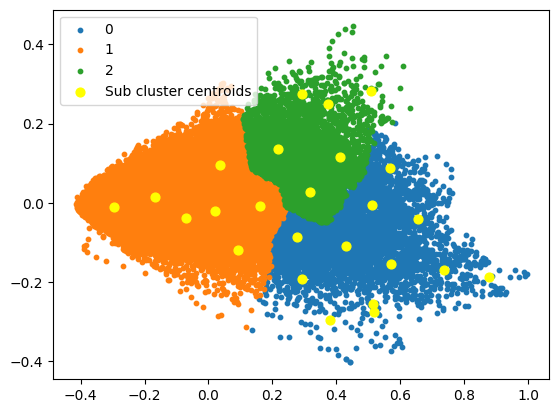

In [14]:
#plt.scatter(x_pca[:, 0], x_pca[:, 1], s = 10, c = y_br)
plt.scatter(x_pca[y_br == 0, 0], x_pca[y_br == 0, 1], s = 10, label = 0)
plt.scatter(x_pca[y_br == 1, 0], x_pca[y_br == 1, 1], s = 10, label = 1)
plt.scatter(x_pca[y_br == 2, 0], x_pca[y_br == 2, 1], s = 10, label = 2)


plt.scatter(br.subcluster_centers_[:, 0], br.subcluster_centers_[:,1], s = 40, c = 'yellow', label = 'Sub cluster centroids')
plt.legend()

<AxesSubplot: xlabel='cluster'>

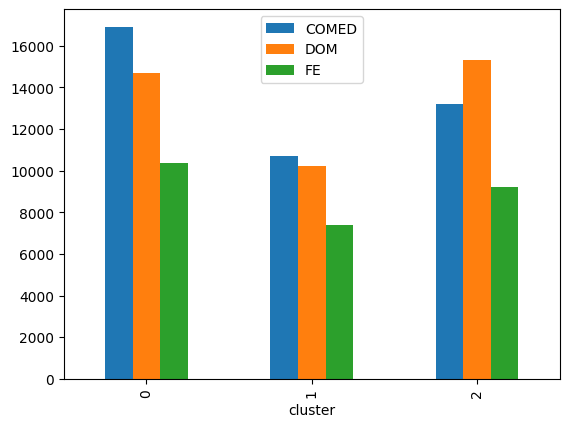

In [15]:
df4.pivot_table((["COMED","FE", "DOM"]),index = ["cluster"]).plot(kind = "bar")

cluster3 = AgglomerativeClustering(n_clusters = 2, metric= "euclidean", linkage="ward")

cluster3.fit(x_pca)
